 - This has been created by using Past Quora comps + Artgor's kernel ! 
 Thanks a lot :)
 - PS  The goal isn't really to beat Artgor's baseline, he can well beat me anytime but to help everyone in picking up Regex mainly!
 
 > Few Kernels used
>> - https://www.kaggle.com/theoviel/improve-your-score-with-text-preprocessing-v2
>> - https://www.kaggle.com/christofhenkel/how-to-preprocessing-when-using-embeddings
>> - https://www.kaggle.com/taindow/simple-cudnngru-python-keras
>> - https://www.kaggle.com/artgor/basic-cnn-in-keras
>> - https://www.kaggle.com/takuok/bidirectional-lstm-and-attention-lb-0-043/

In [1]:
from __future__ import absolute_import, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.tokenize import TweetTokenizer
import datetime
import lightgbm as lgb
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
pd.set_option('max_colwidth',400)


import os
print(os.listdir("../input"))

import random
def set_seed(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

set_seed(2411)
SEED = 42
import psutil
from multiprocessing import Pool
import multiprocessing

num_partitions = 10  # number of partitions to split dataframe
num_cores = psutil.cpu_count()  # number of cores on your machine

print('number of cores:', num_cores)

def df_parallelize_run(df, func):
    
    df_split = np.array_split(df, num_partitions)
    pool = Pool(num_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    
    return df

['fasttext-crawl-300d-2m', 'glove840b300dtxt', 'jigsaw-unintended-bias-in-toxicity-classification']
number of cores: 2


# <center> A Tutorial On Understanding ([Rr]ege)(x|xp|xes|xps|xen)</center>

<center> A common workflow with regular expressions is that you write a pattern for the thing you are looking for... <center>

# Let's see our very first expression

- **<\b[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}\b>**  It's a complex pattern as it includes lots of things like 
    - Character Class
    - Alphabets
    - Percentage
    - Numbers
    - Underscores
    - $\{\}$, word Boundaries etc...
    
> In short  - **this pattern describes an email address; With the above regex pattern, we can search through a text file to find email addresses, or verify if a given string looks like an email address..**

The most basic regex pattern in a token like just an $<b>$ i.e a single literal character. In the string **" Zebra is an animal."**, this will match the very first $b$ in the **Ze$b$** Note that it doesn't matter whether it's present in the middle of the word as of now..

Now let me introduce few very basics things used in $<regex>$ to define itself (remeber the e-mail address pattern above, now we will break into piece by piece..)

In the regex discussed in this tutorial, there are **11** characters with special meanings:
the opening square bracket $<[>$, the backslash, the caret <^>, the dollar sign <$>, the period or dot <.>, the
vertical bar or pipe symbol <|>, the question mark <?>, the asterisk or star <*>, the plus sign <+>, the opening
round bracket <(> and the closing round bracket <)>. These special characters are often called **“metacharacters”**.

|Meta character|Description|
|:----:|----|
|**.**|<b>Period matches any single character except a line break.<b>|
|**[ ]**|<b>Character class. Matches any character contained between the square brackets.<b>|
|**[^ ]**|<b>Negated character class. Matches any character that is not contained between the square brackets <b>.|
|*****|<b>Matches 0 or more repetitions of the preceding symbol.<b>|
|**+**|<b>Matches 1 or more repetitions of the preceding symbol.<b>|
|**?**|<b>Makes the preceding symbol optional.<b>|
|**{n,m}**|<b>Braces. Matches at least "n" but not more than "m" repetitions of the preceding symbol.<b>|
|**(xyz)**|<b>Character group. Matches the characters xyz in that exact order.<b>|
|**&#124;**|<b>Alternation. Matches either the characters before or the characters after the symbol.<b>|
|**&#92;**|<b>Escapes the next character. This allows you to match reserved characters `[ ] ( ) { } . * + ? ^ $ \`.<b>| 
|**^**|<b>Matches the beginning of the input.<b>|
|**$**|<b>Matches the end of the input.<b>|


Read More [here](http://www.rexegg.com/regex-quickstart.html#chars) and [here](http://www.greenend.org.uk/rjk/tech/regexp.html). Both are Very Very Good...

- Example  - If you want to use any of these characters as a literal in a regex, you need to escape them with a backslash. If
you want to match **<1+1=2>**, the correct regex is $1\+1=2$. Otherwise, the plus sign will have a special meaning. **Note** that **<1+1=2>**, with the *backslash omitted*, is a **valid** regex. So you will **not** get an error message. But it
will not match **<1+1=2>**. 

# The Regex-Directed Engine Always Returns the Left-most Match
This is a very important point to understand: a regex-directed engine will always return the leftmost match,
even if a **better** match could be found later. When applying a regex to a string, the engine will start at the
first character of the string. It will try all possible permutations of the regular expression at the first character.
Only if all possibilities have been tried and found to fail, will the engine continue with the second character in
the text. Again, it will try all possible permutations of the regex, in exactly the same order. The result is that
the regex-directed engine will return the leftmost match.
- When applying **<cat\>** to **He captured a catfish for his cat.**, the engine will try to match the first
token in the regex **<c\>** to the first character in the match **H**. This fails. There are no other possible
permutations of this regex, because it merely consists of a sequence of literal characters. So the regex engine
tries to match the **<c\>** with the **e**. This fails too, as does matching the **c** with the space. Arriving at the 4th
character in the match, **<c\>** matches **c**. The engine will then try to match the second token **<a\>** to the 5th
character, **a**. This succeeds too. But then, **<t\>** fails to match **p**. At that point, the engine knows the regex
cannot be matched starting at the 4th character in the match. So it will continue with the 5th: **a**. Again, **<c\>**
fails to match here and the engine carries on. At the 15th character in the match, **<c\>** again matches **c**. The
engine then proceeds to attempt to match the remainder of the regex at character 15 and finds that **<a\>**
matches **a** and **<t\>** matches **t**.

- The entire regular expression could be matched starting at character 15. The engine is **"eager"** to report a
match. **It will therefore report the first three letters of catfish as a valid match**. The engine **never** proceeds
beyond this point to see if there are any **better** matches. The *first match* is considered good enough. 

# Regex's Fundamentals

### Character Sets/Classes
Character sets are also called character class. **Square brackets** are used to specify character sets. Use a **hyphen** inside a character set to specify the characters' range. The order of the character range inside square brackets doesn't matter. For example, the regular expression `[Tt]he` means: `an uppercase T or lowercase t, followed by the letter h, followed by the letter e.`

- **<[Tt]he>** => <font color=red>The</font> car parked in <font color=red>the</font> garage.

A period inside a character set, however, means a literal period. The regular expression **<ar[.]>** means: a lowercase character a, followed by letter r, followed by a period **.** character.

- **<ar[.]>** => A garage is a good place to park a c<font color=red>ar.</font>

- **<[0-9]>** => Matches a **single digit between 0 and 9**. You can use more than one range.
- **<[0-9a-fA-F]>** => Matches a **single hexadecimal digit**, case insensitively. 
- You can combine ranges and single characters. **<[0-9a-fxA-FX]>** matches a hexadecimal digit or the letter X.* Again, the order of the characters and the ranges does not matter.*
- Find a word, even if it is misspelled, such as **<sep[ae]r[ae]te>** or **<li[cs]en[cs]e>**. 

### Negated Character Sets/Classes

Typing a **caret(^)** after the opening square bracket will negate the character class. **The result is that the character
class will match any character that is <font color = red>not </font> in the character class.**
- It is important to remember that a negated character class **still must match a character**. **<q[^u]>** does not
mean: **<font color= red> a q not followed by a u </font>**. It means: **<font color= red a q followed by a character that is not a u </font>**. It will **not** match the
$q$ in the string $Iraq$. It will match the $q$ and $the space$ after the $q$ in **Iraq is a country**.

###  Shorthand Character Sets

Regular expression provides **shorthands** for the commonly used character sets,
which offer **convenient shorthands** for commonly used regular expressions. The
shorthand character sets are as follows:

|Shorthand|Description|
|:----:|----|
|<b>.<b>|<b>Any character except new line. It's the most commonly misused metacharacter.<b>|
|<b>\w<b>|<b>Matches alphanumeric characters: `[a-zA-Z0-9_]`<b>|
|<b>\W<b>|<b>Matches non-alphanumeric characters: `[^\w]`<b>|
|<b>\d<b>|<b>Matches digit: `[0-9]`<b>|
|<b>\D<b>|<b>Matches non-digit: `[^\d]`<b>|
|<b>\s<b>|<b>Matches whitespace character: `[\t\n\f\r\p{Z}]`<b>|
|<b>\S<b>|<b>Matches non-whitespace character: `[^\s]`<b>|
    
## Repetitions

Following meta characters `+`, `*` or `?` are used to specify how many times a
subpattern can occur. These meta characters act differently in different
situations.

### The Star *

The symbol `*` matches zero or more repetitions of the preceding matcher. The
regular expression `a*` means: zero or more repetitions of preceding lowercase
character `a`. But if it appears after a character set or class then it finds
the repetitions of the whole character set. 
For example, the regular expression
- `[a-z]*` means: any number of lowercase letters in a row.

The `*` symbol can be used with the meta character `.` to match any string of
characters `.*`. The `*` symbol can be used with the whitespace character `\s`
to match a string of whitespace characters. For example, the expression
`\s*cat\s*` means: zero or more spaces, followed by lowercase character `c`,
followed by lowercase character `a`, followed by lowercase character `t`,
followed by zero or more spaces.

### The Plus +

The symbol `+` matches one or more repetitions of the preceding character. For
example, the regular expression `c.+t` means: lowercase letter `c`, followed by
at least one character, followed by the lowercase character `t`. It needs to be
clarified that `t` is the last `t` in the sentence.

- **<c.+t>** => The fat <font color='red'> cat sat on the mat</font>.

### The Question Mark ?
In regular expression the meta character `?` makes the preceding character optional. This symbol matches zero or one instance of the preceding character. For example, the regular expression `[T]?he` means: `Optional the uppercase letter T, followed by the lowercase character h, followed by the lowercase character e.`

- **<[Tt]he>** => <font color=red>The</font> car parked in <font color=red>the</font> garage.

### The Lazy Star *? 

Repeats the previous item zero or more times. Lazy, so the engine first attempts to skip the
previous item, before trying permutations with ever increasing matches of the preceding
item. 

|Regex|Means|
|:----:|----|
|abc+|        matches a string that has ab followed by one or more c|
|abc?|       matches a string that has ab followed by zero or one c|
|abc{2}|      matches a string that has ab followed by 2 c|
|abc{2,}|    matches a string that has ab followed by 2 or more c|
|abc{2,5}|    matches a string that has ab followed by 2 up to 5 c|
|a(bc)\*|     matches a string that has a followed by zero or more copies of the sequence bc|
|a(bc){2,5}|  matches a string that has a followed by 2 up to 5 copies of the sequence bc|
|**<.+>**| matches `<div>simple div</div>`|

## Full stop or Period or dot **.**

In regular expressions, the dot or period is one of the most commonly used metacharacters. Unfortunately, it
is also the most commonly misused metacharacter. The dot is short for the negated character class **<[^\n]>** (UNIX regex flavors) or
**<[^\r\n]>** (Windows regex flavors).

<font color = 'Red'> <b> Use The Dot Sparingly </b> </font>
- The dot is a **very powerful** regex metacharacter. It allows you to be **lazy**. `Put in a dot, and everything will
match just fine when you test the regex on valid data. The problem is that the regex will also match in cases
where it should not match..`
    
Example - Let’s say we want to match a date in `mm/dd/yy` format, but we
want to leave the user the choice of date separators. The quick solution is **<\d\d.\d\d.\d\d>**. Seems fine at
first sight.. It will match a date like `02/12/03` just what we intended, So fine... 
- <font color='red'> <b> Trouble is: 02512703<b></font> is also considered a **valid date** by this regular expression. In this match, the first dot matched $5$, and the second matched $7$. Obviously $not$ what we intended. 
    
## Start of String and End of String Anchors ( $ and ^)

Anchors are a different breed. They do not match any character at all. Instead, they match a position before,
after or between characters. They can be used to `anchor` the regex match at a certain position. 
- The caret **<^>**
matches the position before the first character in the string. Applying **<^a>** to `abc` matches `a`. **<^b>** will
not match `abc` at all, because the **<b\>** cannot be matched right after the start of the string, matched by **<^>**.
- Similarly, **<\$>** matches right after the last character in the string. **<c\$>** matches `c` in `abc`, while **<a\$>** `does not` match `abc` at all....

# Examples

- Regex are now written in Quotes (\`)
- The String to be matched is in ("bold")

Suppose you want to use a regex to match a list of function names in a programming language: "**Get, GetValue, Set or SetValue.**" 
- The obvious solution is `Get|GetValue|Set|SetValue`

*Now take a look closer carefully at the regex and the string, both.
Here are some other ways to do the same task*
-  `Get(Value)?|Set(Value)?`
-  `\b(Get|GetValue|Set|SetValue)\b`
-  `\b(Get(Value)?|Set(Value)?)\b`
- Even this one is correct `\b(Get|Set)(Value)?\b`

**Regex**:	`<[^>]+>`
- **What it does**:	This finds any HTML, such as `<\a>, <\b>, <\img />, <\br />, etc`. You can use this to find segments that have HTML tags you need to deal with, or to remove all HTML tags from a text.
    
**Regex**:	`https?:\/\/[\w\.\/\-?=&%,]+`
- What it does:	This will find a URL. It will capture most URLs that begin with http:// or https://.

**Regex**:	`'\w+?'`
- **What it does**:	This finds single words that are surrounded by apostrophes.

**Regex**:	`([-A-Za-z0-9_]*?([-A-Za-z_][0-9]|[0-9][-A-Za-z_])[-A-Za-z0-9_]*)`
- **What it does**:	Alphanumeric part numbers and references like: 1111_A, AA1AAA or 1-1-1-A, 21A1 and 10UC10P-BACW, abcd-1234, 1234-pqtJK, sft-0021 or 21-1_AB and 55A or AK7_GY.
This can be very useful if you are translating documents that have a lot of alphanumeric codes or references in them, and you need to be able to find them easily.

**Regex**:	`\b(the|The)\b.*?\b(?=\W?\b(is|are|was|can|shall| must|that|which|about|by|at|if|when|should|among|above|under|$)\b)`
- **What it does**:	This finds text that begins with the or The and ends with stop words such as is, are, was, can, shall, must, that, which, about, by, at, if, when, should, among, above or under, or the end of the segment.
This is particularly useful when you need to extract terminology. Suppose you have segments like these:
`
The Web based look up is our new feature. A project manager should not proofread... Our Product Name is...`
    - The Regex shown above would find anything between The and is, or should. With most texts, there is a good chance that anything this Regex finds is a good term that you can add to your Termbase.

**Regex**:	`\b(a|an|A|An)\b.*?\b(?=\W?\b(is|are|was|can|shall|must |that|which|about|by|at|if|when|among|above|under|$)\b)`
- **What it does**:	This works much like the Regex shown above, except that it finds text that begins with a or an, rather than the. This can also be very helpful when you need to extract terminology from a project.

**Regex**:  `\b(this|these|This|These)\b.*?\b(?=\W?\b(is|are|was|can|shall|must|that|which|about|by|at|if|when|among|above|under|$)\b)`
    - **What it does**:	This works much like the Regex shown above, except that it finds text that begins with this or these. This can also be very helpful when you need to extract terminology from a project.

**Regex** :`(.*?)`
- **What it does** : Accept blah-blah-blah...

## Python [re module](https://docs.python.org/3/library/re.html)

- `re.sub(regex, replacement, subject)` performs a search-and-replace across subject, replacing all
matches of regex in subject with replacement. The result is returned by the sub() function. **The subject
string you pass is not modified**. The re.sub() function applies the same backslash logic to the replacement text as is applied to the regular expression. Therefore, you should use raw strings for the replacement text...

In [2]:
import re

tweet = '#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android +#apps +#beautiful \
         #cute #health #igers #iphoneonly #iphonesia #iphone \
             <3 ;D :( :-('

#Let's take care of emojis and the #(hash-tags)...

print(f'Original Tweet ---- \n {tweet}')

## Replacing #hashtag with only hashtag
tweet = re.sub(r'#(\S+)', r' \1 ', tweet)
#this gets a bit technical as here we are using Backreferencing and Character Sets Shorthands and replacing the captured Group.
#\S = [^\s] Matches any charachter that isn't white space
print(f'\n Tweet after replacing hashtags ----\n  {tweet}')

## Love -- <3, :*
tweet = re.sub(r'(<3|:\*)', ' EMO_POS ', tweet)
print(f'\n Tweet after replacing Emojis for Love with EMP_POS ----\n  {tweet}')

#The parentheses are for Grouping, so we search (remeber the raw string (`r`))
#either for <3 or(|) :\* (as * is a meta character, so preceeded by the backslash)

## Wink -- ;-), ;), ;-D, ;D, (;,  (-;
tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', ' EMO_POS ', tweet)
print(f'\n Tweet after replacing Emojis for Wink with EMP_POS ----\n  {tweet}')

#The parentheses are for Grouping as usual, then we first focus on `;-), ;),`, so we can see that 1st we need to have a ;
#and then we can either have a `-` or nothing, so we can do this via using our `?` clubbed with `;` and hence we have the very
#starting with `(;-?\)` and simarly for others...

## Sad -- :-(, : (, :(, ):, )-:
tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', tweet)
print(f'\n Tweet after replacing Emojis for Sad with EMP_NEG ----\n  {tweet}')

Original Tweet ---- 
 #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android +#apps +#beautiful          #cute #health #igers #iphoneonly #iphonesia #iphone              <3 ;D :( :-(

 Tweet after replacing hashtags ----
   fingerprint   Pregnancy  Test https://goo.gl/h1MfQV  android  + apps  + beautiful            cute   health   igers   iphoneonly   iphonesia   iphone               <3 ;D :( :-(

 Tweet after replacing Emojis for Love with EMP_POS ----
   fingerprint   Pregnancy  Test https://goo.gl/h1MfQV  android  + apps  + beautiful            cute   health   igers   iphoneonly   iphonesia   iphone                EMO_POS  ;D :( :-(

 Tweet after replacing Emojis for Wink with EMP_POS ----
   fingerprint   Pregnancy  Test https://goo.gl/h1MfQV  android  + apps  + beautiful            cute   health   igers   iphoneonly   iphonesia   iphone                EMO_POS   EMO_POS  :( :-(

 Tweet after replacing Emojis for Sad with EMP_NEG ----
   fingerprint   Pregnancy  Test https://go

In [3]:
##See the Output Carefully, there are Spaces inbetween un-necessary...
## Replace multiple spaces with a single space
tweet = re.sub(r'\s+', ' ', tweet)
print(f'\n Tweet after replacing xtra spaces ----\n  {tweet}')
      
##Replace the Puctuations (+,;) 
tweet = re.sub(r'[^\w\s]','',tweet)
print(f'\n Tweet after replacing Punctuation + with PUNC ----\n  {tweet}')


 Tweet after replacing xtra spaces ----
   fingerprint Pregnancy Test https://goo.gl/h1MfQV android + apps + beautiful cute health igers iphoneonly iphonesia iphone EMO_POS EMO_POS EMO_NEG EMO_NEG 

 Tweet after replacing Punctuation + with PUNC ----
   fingerprint Pregnancy Test httpsgooglh1MfQV android  apps  beautiful cute health igers iphoneonly iphonesia iphone EMO_POS EMO_POS EMO_NEG EMO_NEG 


In [4]:
# bags of positive/negative smiles (You can extend the above example to take care of these few too...))) A good Excercise...

positive_emojis = set([
":‑)",":)",":-]",":]",":-3",":3",":->",":>","8-)","8)",":-}",":}",":o)",":c)",":^)","=]","=)",":‑D",":D","8‑D","8D",
"x‑D","xD","X‑D","XD","=D","=3","B^D",":-))",";‑)",";)","*-)","*)",";‑]",";]",";^)",":‑,",";D",":‑P",":P","X‑P","XP",
"x‑p","xp",":‑p",":p",":‑Þ",":Þ",":‑þ",":þ",":‑b",":b","d:","=p",">:P", ":'‑)", ":')",  ":-*", ":*", ":×"
])
negative_emojis = set([
":‑(",":(",":‑c",":c",":‑<",":<",":‑[",":[",":-||",">:[",":{",":@",">:(","D‑':","D:<","D:","D8","D;","D=","DX",":‑/",
":/",":‑.",'>:\\', ">:/", ":\\", "=/" ,"=\\", ":L", "=L",":S",":‑|",":|","|‑O","<:‑|"
])

del positive_emojis, negative_emojis

In [5]:
## Valid Dates..
pattern = r'(19|20)\d\d[- /.](0[1-9]|1[012])[- /.](0[1-9]|[12][0-9]|3[01])' 

- matches a date in yyyy-mm-dd format from between 1900-01-01 and 2099-12-31, with a choice of four separators(space included :))

- The year is matched by `(19|20)\d\d`
- The month is matched by `(0[1-9]|1[012])` (rounding brackets are necessary so that to include both the options)
    - By using character classes, 
        - the first option matches a number between `01 and 09`, and 
        - the second matches `10, 11 or 12`
- The last part of the regex consists of three options. The first matches the numbers `01
through 09`, the second `10 through 29`, and the third matches `30 or 31`... 

In [6]:
## Pattern to match any IP Addresses 
pattern = r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b'

the above pattern will also match `999.999.999.999` but that isn't a valid IP at all
Now this depends on the data at hand as to how far you want the regex to be accurate...
To restrict all `4` numbers in the IP address to `0..255`, you can use this
complex beast: 
- `\b(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-
9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-
4][0-9]|[01]?[0-9][0-9]?)\b`

# References (A lot)

- http://www.rexegg.com/ <<<< THE ULTIMATE WEBSITE>>>>
- https://github.com/aloisdg/awesome-regex
- http://linuxreviews.org/beginner/tao_of_regular_expressions/tao_of_regular_expressions.en.print.pdf
- https://developers.google.com/edu/python/regular-expressions
- https://www.youtube.com/watch?v=EkluES9Rvak

PS I wrote (above things) for the [Amazing Course](https://mlcourse.ai/) which is maintained by [@kashnitsky](https://www.kaggle.com/kashnitsky),[@artgor](https://www.kaggle.com/artgor) , [@datamove](https://www.kaggle.com/metadist) etc. and many many many other amazing peoples from ODS who framed the amazing course;

You can find the source nbs [here](https://github.com/Yorko/mlcourse.ai/tree/master/jupyter_english/tutorials) and a lot of very cool stuffs there as well !!!

<center> ** <font color ='red'> So Now we are good to go!! Armed with regex, let's see what they can do.. </font> ** </center>

 #### StarDate Captain's Logs xD
 - latest - I tried updating the arch.
 - v14 - I tried some text cleaning via spelling correction and addded a new re pattern to fix texts. Looking fo an automated way to clean text.

In [7]:
%%time
train = pd.read_csv('../input/jigsaw-unintended-bias-in-toxicity-classification/train.csv',usecols=['comment_text', 'target'])
test = pd.read_csv('../input/jigsaw-unintended-bias-in-toxicity-classification/test.csv')
sub = pd.read_csv('../input/jigsaw-unintended-bias-in-toxicity-classification/sample_submission.csv')
train.shape, test.shape

CPU times: user 8.23 s, sys: 800 ms, total: 9.03 s
Wall time: 9.18 s


In [8]:
# From Quora kaggle Comp's (latest one)
import re
# remove space
spaces = ['\u200b', '\u200e', '\u202a', '\u202c', '\ufeff', '\uf0d8', '\u2061', '\x10', '\x7f', '\x9d', '\xad', '\xa0']
def remove_space(text):
    """
    remove extra spaces and ending space if any
    """
    for space in spaces:
        text = text.replace(space, ' ')
    text = text.strip()
    text = re.sub('\s+', ' ', text)
    return text

# replace strange punctuations and raplace diacritics
from unicodedata import category, name, normalize

def remove_diacritics(s):
    return ''.join(c for c in normalize('NFKD', s.replace('ø', 'o').replace('Ø', 'O').replace('⁻', '-').replace('₋', '-'))
                  if category(c) != 'Mn')

special_punc_mappings = {"—": "-", "–": "-", "_": "-", '”': '"', "″": '"', '“': '"', '•': '.', '−': '-',
                         "’": "'", "‘": "'", "´": "'", "`": "'", '\u200b': ' ', '\xa0': ' ','،':'','„':'',
                         '…': ' ... ', '\ufeff': ''}
def clean_special_punctuations(text):
    for punc in special_punc_mappings:
        if punc in text:
            text = text.replace(punc, special_punc_mappings[punc])
    text = remove_diacritics(text)
    return text

# clean numbers
def clean_number(text):
    if bool(re.search(r'\d', text)):
        text = re.sub(r'(\d+)([a-zA-Z])', '\g<1> \g<2>', text) # digits followed by a single alphabet...
        text = re.sub(r'(\d+) (th|st|nd|rd) ', '\g<1>\g<2> ', text) #1st, 2nd, 3rd, 4th...
        text = re.sub(r'(\d+),(\d+)', '\g<1>\g<2>', text)
    return text

import string
regular_punct = list(string.punctuation)
extra_punct = [
    ',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&',
    '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
    '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',
    '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”',
    '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾',
    '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
    '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
    'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
    '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
    '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤',
    ':)', ': )', ':-)', '(:', '( :', '(-:', ':\')',
    ':D', ': D', ':-D', 'xD', 'x-D', 'XD', 'X-D',
    '<3', ':*',
    ';-)', ';)', ';-D', ';D', '(;',  '(-;',
    ':-(', ': (', ':(', '\'):', ')-:',
    '-- :','(', ':\'(', ':"(\'',]

def handle_emojis(text): #Speed can be improved via a simple if check :)
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    text = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMO_POS ', text)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    text = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMO_POS ', text)
    # Love -- <3, :*
    text = re.sub(r'(<3|:\*)', ' EMO_POS ', text)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    text = re.sub(r'(;-?\)|;-?D|\(-?;)', ' EMO_POS ', text)
    # Sad -- :-(, : (, :(, ):, )-:
    text = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', text)
    # Cry -- :,(, :'(, :"(
    text = re.sub(r'(:,\(|:\'\(|:"\()', ' EMO_NEG ', text)
    return text

def stop(text):
    
    from nltk.corpus import stopwords
    
    text = " ".join([w.lower() for w in text.split()])
    stop_words = stopwords.words('english')
    
    words = [w for w in text.split() if not w in stop_words]
    return " ".join(words)

all_punct = list(set(regular_punct + extra_punct))
# do not spacing - and .
all_punct.remove('-')
all_punct.remove('.')

# clean repeated letters
def clean_repeat_words(text):
    
    text = re.sub(r"(I|i)(I|i)+ng", "ing", text)
    text = re.sub(r"(L|l)(L|l)(L|l)+y", "lly", text)
    text = re.sub(r"(A|a)(A|a)(A|a)+", "a", text)
    text = re.sub(r"(C|c)(C|c)(C|c)+", "cc", text)
    text = re.sub(r"(D|d)(D|d)(D|d)+", "dd", text)
    text = re.sub(r"(E|e)(E|e)(E|e)+", "ee", text)
    text = re.sub(r"(F|f)(F|f)(F|f)+", "ff", text)
    text = re.sub(r"(G|g)(G|g)(G|g)+", "gg", text)
    text = re.sub(r"(I|i)(I|i)(I|i)+", "i", text)
    text = re.sub(r"(K|k)(K|k)(K|k)+", "k", text)
    text = re.sub(r"(L|l)(L|l)(L|l)+", "ll", text)
    text = re.sub(r"(M|m)(M|m)(M|m)+", "mm", text)
    text = re.sub(r"(N|n)(N|n)(N|n)+", "nn", text)
    text = re.sub(r"(O|o)(O|o)(O|o)+", "oo", text)
    text = re.sub(r"(P|p)(P|p)(P|p)+", "pp", text)
    text = re.sub(r"(Q|q)(Q|q)+", "q", text)
    text = re.sub(r"(R|r)(R|r)(R|r)+", "rr", text)
    text = re.sub(r"(S|s)(S|s)(S|s)+", "ss", text)
    text = re.sub(r"(T|t)(T|t)(T|t)+", "tt", text)
    text = re.sub(r"(V|v)(V|v)+", "v", text)
    text = re.sub(r"(Y|y)(Y|y)(Y|y)+", "y", text)
    text = re.sub(r"plzz+", "please", text)
    text = re.sub(r"(Z|z)(Z|z)(Z|z)+", "zz", text)
    text = re.sub(r"(-+|\.+)", " ", text) #new haha #this adds a space token so we need to remove xtra spaces
    return text

def spacing_punctuation(text):
    """
    add space before and after punctuation and symbols
    """
    for punc in all_punct:
        if punc in text:
            text = text.replace(punc, f' {punc} ')
    return text

def preprocess(text):
    """
    preprocess text main steps
    """
    text = remove_space(text)
    text = clean_special_punctuations(text)
    text = handle_emojis(text)
    text = clean_number(text)
    text = spacing_punctuation(text)
    text = clean_repeat_words(text)
    text = remove_space(text)
    #text = stop(text)# if changing this, then chnage the dims 
    #(not to be done yet as its effecting the embeddings..,we might be
    #loosing words)...
    return text

mispell_dict = {'😉':'wink','😂':'joy','😀':'stuck out tongue', 'theguardian':'the guardian','deplorables':'deplorable', 'theglobeandmail':'the globe and mail', 'justiciaries': 'justiciary','creditdation': 'Accreditation','doctrne':'doctrine','fentayal': 'fentanyl','designation-': 'designation','CONartist' : 'con-artist','Mutilitated' : 'Mutilated','Obumblers': 'bumblers','negotiatiations': 'negotiations','dood-': 'dood','irakis' : 'iraki','cooerate': 'cooperate','COx':'cox','racistcomments':'racist comments','envirnmetalists': 'environmentalists',}
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

def correct_spelling(x, dic):
    for word in dic.keys():
        x = x.replace(word, dic[word])
    return x

def correct_contraction(x, dic):
    for word in dic.keys():
        x = x.replace(word, dic[word])
    return x

In [9]:
%%time

from tqdm import tqdm
tqdm.pandas()

def text_clean_wrapper(df):
    
    df["comment_text"] = df["comment_text"].astype('str').transform(preprocess)
    df['comment_text'] = df['comment_text'].transform(lambda x: correct_spelling(x, mispell_dict))
    df['comment_text'] = df['comment_text'].transform(lambda x: correct_contraction(x, contraction_mapping))
    
    return df

#fast!
train = df_parallelize_run(train, text_clean_wrapper)
test  = df_parallelize_run(test, text_clean_wrapper)

import gc
gc.enable()
del mispell_dict, all_punct, special_punc_mappings, regular_punct, extra_punct
gc.collect()

CPU times: user 3.25 s, sys: 3.17 s, total: 6.42 s
Wall time: 12min 43s


In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU, CuDNNGRU, CuDNNLSTM, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.engine import InputSpec, Layer
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

import os
import time
import gensim
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem.lancaster import LancasterStemmer
lc = LancasterStemmer()
from nltk.stem import SnowballStemmer
sb = SnowballStemmer("english")

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import CuDNNLSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D, GlobalMaxPooling1D, GlobalAveragePooling1D, BatchNormalization
from keras.layers import Input, Embedding, Dense, Conv2D, MaxPool2D, concatenate
from keras.layers import Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D
from keras.optimizers import Adam
from keras.models import Model
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.callbacks import EarlyStopping

import sys
from os.path import dirname
from keras.engine import InputSpec, Layer

import spacy


# https://www.kaggle.com/takuok/bidirectional-lstm-and-attention-lb-0-043/
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

Using TensorFlow backend.


In [11]:
train.head(1)

,target,comment_text
0,0.0,"This is so cool It ' s like , ' would you want your mother to read this ? ? ' Really great idea , well done !"


In [12]:
import time
start_time = time.time()
print("Loading data ...")

full_text = pd.concat([train['comment_text'].astype(str), test['comment_text'].astype(str)])
y = train['target']
num_train_data = y.shape[0]
print("--- %s seconds ---" % (time.time() - start_time))
from tqdm import tqdm_notebook as tqdm
start_time = time.time()
print("Spacy NLP ...")
nlp = spacy.load('en_core_web_lg', disable=['parser','ner','tagger'])
nlp.vocab.add_flag(lambda s: s.lower() in spacy.lang.en.stop_words.STOP_WORDS, spacy.attrs.IS_STOP)
word_dict = {}
word_index = 1
lemma_dict = {}
docs = nlp.pipe(full_text, n_threads = 4)
word_sequences = []
for doc in tqdm(docs):
    word_seq = []
    for token in doc:
        if (token.text not in word_dict) and (token.pos_ is not "PUNCT"):
            word_dict[token.text] = word_index
            word_index += 1
            lemma_dict[token.text] = token.lemma_
        if token.pos_ is not "PUNCT":
            word_seq.append(word_dict[token.text])
    word_sequences.append(word_seq)
del docs
import gc
gc.collect()
train_word_sequences = word_sequences[:num_train_data]
test_word_sequences = word_sequences[num_train_data:]
print("--- %s seconds ---" % (time.time() - start_time))

Loading data ...
--- 0.5262837409973145 seconds ---
Spacy NLP ...


In [13]:
max_len = 128
X_train = pad_sequences(train_word_sequences, maxlen = max_len)
X_test  = pad_sequences(test_word_sequences, maxlen = max_len)
del train_word_sequences, test_word_sequences
gc.collect()

0

In [14]:
embed_size = 300
#max_features = 377645 #NB this will change if you change any pre-processing (working to auto-mating this, kinda NEW to NLP:))

In [15]:
#quora comp
def load_glove(word_dict, lemma_dict):
    from gensim.models import KeyedVectors
    EMBEDDING_FILE = '../input/glove840b300dtxt/glove.840B.300d.txt'
    def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE) if len(o)>100 and o.split(" ")[0] in word_dict.keys())
    #embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))
    embed_size = 300
    nb_words = len(word_dict)+1
    embedding_matrix = np.zeros((nb_words, embed_size), dtype=np.float32)
    unknown_vector = np.zeros((embed_size,), dtype=np.float32) - 1.
    print(unknown_vector[:5])
    for key in tqdm(word_dict):
        word = key
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = key.lower()
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = key.upper()
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = key.capitalize()
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = ps.stem(key)
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = lc.stem(key)
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = sb.stem(key)
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = lemma_dict[key]
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        embedding_matrix[word_dict[key]] = unknown_vector                    
    return embedding_matrix, nb_words

print("Loading embedding matrix ...")
embedding_matrix, nb_words =  load_glove(word_dict, lemma_dict)
max_features = nb_words
print("--- %s seconds ---" % (time.time() - start_time))
#..........

Loading embedding matrix ...
[-1. -1. -1. -1. -1.]



--- 1740.061482667923 seconds ---


In [16]:
y = np.where(train['target'] >= 0.5, True, False) * 1 #As per comp's DESC

In [17]:
del nb_words, lemma_dict, word_dict, word_index, train, test
gc.collect()
embedding_matrix.shape

(411175, 300)

In [18]:
K.clear_session()

def build_model(lr=0.0, lr_d=0.0, spatial_dr=0.0,  dense_units=128, dr=0.1):
    
    from keras.layers import LSTM, Bidirectional, Dropout
    
    file_path = "best_model.hdf5"
    check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                                  save_best_only = True, mode = "min")
    early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)
    
    inp = Input(shape=(max_len,))

    x = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=False)(inp)
    x = SpatialDropout1D(spatial_dr)(x)
    
    x1 = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
    x2 = Bidirectional(CuDNNGRU(128, return_sequences=True))(x1)
    
    max_pool1 = GlobalMaxPooling1D()(x1)
    max_pool2 = GlobalMaxPooling1D()(x2)
    
    conc = Concatenate()([max_pool1, max_pool2])
    predictions = Dense(1, activation='sigmoid')(conc)
    
    model = Model(inputs=inp, outputs=predictions)
    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])

    history = model.fit(X_train, y, batch_size = 512, epochs = 15, validation_split=0.1, 
                        verbose = 1, callbacks = [check_point, early_stop])
    
    #model = load_model(file_path)
    
    return model

In [19]:
model = build_model(lr = 1e-3, lr_d = 0.001, spatial_dr = 0.23, dr=0.2)
del X_train, embedding_matrix
gc.collect()

Train on 1624386 samples, validate on 180488 samples
Epoch 1/15
1624386/1624386 [==============================] - 334s 205us/step - loss: 0.1406 - acc: 0.9464 - val_loss: 0.1336 - val_acc: 0.9469

Epoch 00001: val_loss improved from inf to 0.13355, saving model to best_model.hdf5
Epoch 2/15
1624386/1624386 [==============================] - 333s 205us/step - loss: 0.1249 - acc: 0.9513 - val_loss: 0.1294 - val_acc: 0.9482

Epoch 00002: val_loss improved from 0.13355 to 0.12944, saving model to best_model.hdf5
Epoch 3/15
1624386/1624386 [==============================] - 332s 204us/step - loss: 0.1212 - acc: 0.9527 - val_loss: 0.1287 - val_acc: 0.9482

Epoch 00003: val_loss improved from 0.12944 to 0.12874, saving model to best_model.hdf5
Epoch 4/15
1100288/1624386 [===================>..........] - ETA: 1:42 - loss: 0.1191 - acc: 0.9532

In [20]:
pred = model.predict(X_test, batch_size = 512, verbose = 1)

97320/97320 [==============================] - 8s 82us/step


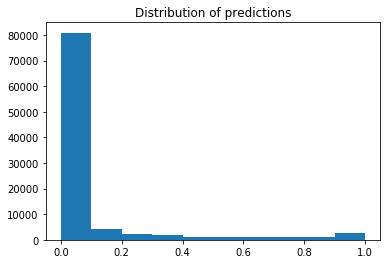

In [21]:
plt.hist(pred);
plt.title('Distribution of predictions');

In [22]:
sub['prediction'] = pred
sub.to_csv('submission.csv', index=False)

In [23]:
pred = model.predict(X_test, batch_size = 512, verbose = 1)

from keras.utils import plot_model
plot_model(model, to_file='model.png')

97320/97320 [==============================] - 8s 79us/step
